# Homework 4: Differentiation and Integration

In [1]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

## Question 1: Write your own integration and differentiation routine 
(points - 0.5)

Write a function using your favourite algorithm to integrate a function from $a$ to $b$ and to take derivative at a specific point $x_0$. Use these functions in the solution of the next problem.

Integration:

[ 0 , 3.141592653589793 ]
simple sin(x) = 	 1.9999984312683812
simpson sin(x) = 	 2.0000000000009845
simpson req sin(x) = 	 2.00000000000034

[ 0 , 10 ]
simple x^2 =    	 332.84521102905273
simpson x^2 =     	 333.3333333333335
simpson req x^2 = 	 333.33333333333337


Derivative:

x_0 = 1.5707963267948966
simple d/dx sin(x) = 	 -0.00048828121123278834
advanced d/dx sin(x) = 	 -2.842170943040401e-14

x_0 = 1
simple d/dx x^2 = 	 2.0009765625
advanced d/dx x^2 = 	 2.0


	Showcase!!!




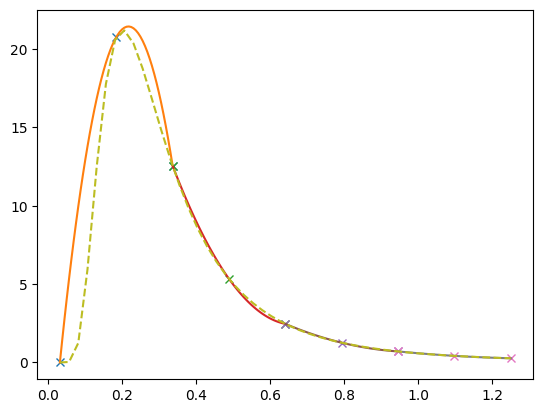

Integration simpson: 	 7.250861503136378


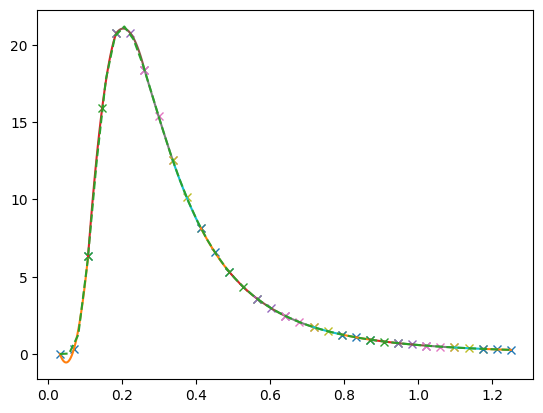

Integration simpson: 	 6.368417814943215


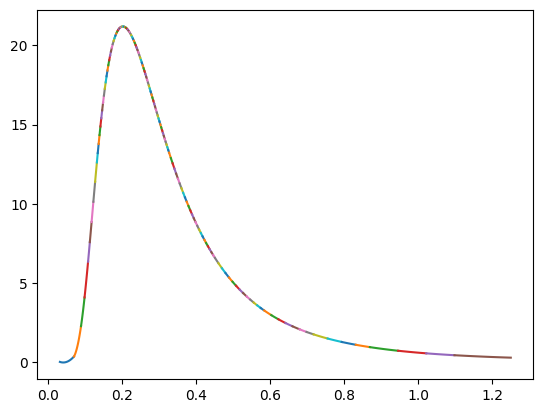

Integration simpson: 	 6.3693552943090666
sin(x)!!!


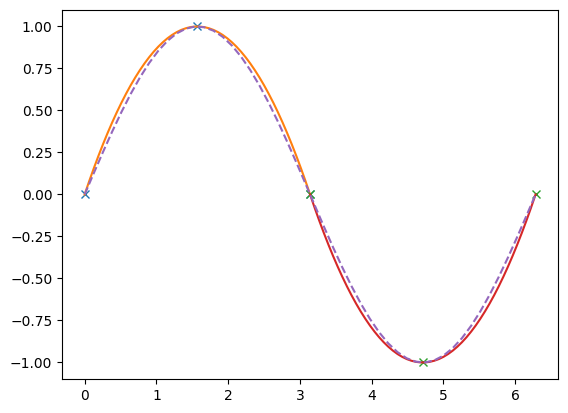

Integration simpson: 	 0.0


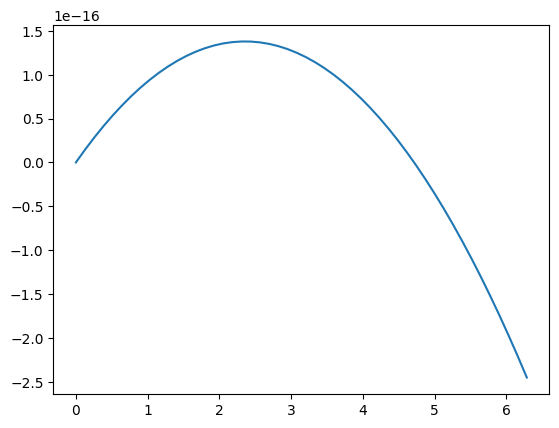

Integration simpson: 	 2.5648942582957195e-16

	Thanks for your attention!


In [76]:
def integrate(f, a, b, n=1024): # change to n=1024 for better accuracy
    dx = (b-a)/n
    res = 0
    for i in np.arange(a,b,dx):
        res += dx * f(i)
    return res

def derivative(f, x0, dx=0.01):
    return (f(x0 + dx) - f(x0))/dx

# I taken my time to understand better some methods

# P(x) is a function that approximate f(x) in [a,b] in Simpson rule
# I use it to visualize the operations
def P(x, f, a, b):
    m = (a+b)/2
    return f(a)*((x-m)*(x-b))/((a-m)*(a-b)) \
            + f(m)*((x-a)*(x-b))/((m-a)*(m-b)) \
            + f(b)*((x-a)*(x-m))/((b-a)*(b-m))

# integrate_fav is itarative Simpson's rule
def integrate_fav(f, a, b, n=1024, ploting=False):    
    if ploting: plt.clf()
    dx = (b-a)/n
    res = 0
    fa = f(a)
    fn = f(a+dx)
    fb = f(a+dx+dx)
    for i in np.arange(a,b,2*dx):
        if ploting:
            plt.plot([i, i+dx, i+2*dx],[fa, fn, fb],"x")
            plt.plot(np.linspace(i, i+2*dx), (lambda x : P(x,f,i,i+2*dx))(np.linspace(i, i+2*dx)))
            #plt.vlines(x = i+2*dx, ymin = -1, ymax = +1, linestyles="--", colors="grey")
        res += dx/3 * (fa + 4*fn + fb)
        #print(i, i+2*dx, dx/3 * (fa + 4*fn + fb), res)
        fa = fb
        fn = f(i+3*dx)
        fb = f(i+4*dx)
        
    if ploting:
        func = (lambda x : f(x))(np.linspace(a,b))
        plt.plot(np.linspace(a,b),func,"--")
        plt.show()
        plt.close()
    return res

# integrate_fav_req is adaptive recursive Simpson's rule | interesting case: sin(x) in [0, 2pi]
def integrate_fav_req(f, a, b, TOL=2**(-4), ploting=False):  
    if ploting: plt.close()  
    def integrate_(f, a, fa, b, fb, TOL):
        n = (a+b)/2
        fn = f(n)
        res = (b-a)/6 * (fa + 4*fn + fb)
        if res < TOL:
            if ploting:
                plt.plot(np.linspace(a,b), (lambda x : P(x,f,a,b))(np.linspace(a, b)))
            return res
        else:
            return integrate_(f, a, fa, n, fn, TOL) \
            + integrate_(f, n, fn, b, fb, TOL)
    
    result = integrate_(f, a, f(a), b, f(b), TOL)
    if ploting:
        #func = (lambda x : f(x))(np.linspace(a,b))
        #plt.plot(np.linspace(a,b),func,"--")
        plt.show()
        plt.close()
    return result

# one of the derivative methods described in lecture
def derivative_fav(f, x0, dx=2**(-4)):
    return 1/12/dx * \
        (-f(x0+dx+dx)
         -8*f(x0-dx)
         +8*f(x0+dx)
         +f(x0-dx-dx))

# showcase of methods / comparison
print("Integration:\n")
fun = np.sin
x_min = 0
x_max = np.pi
print("[", x_min, ",", x_max, "]")
print("simple sin(x) = \t", integrate(fun ,x_min, x_max, 2**10))
print("simpson sin(x) = \t", integrate_fav(fun ,x_min, x_max, 2**(10)))
print("simpson req sin(x) = \t", integrate_fav_req(fun ,x_min, x_max, 2**(-10)))

fun = (lambda x : x**2)
x_min = 0
x_max = 10
print("\n[", x_min, ",", x_max, "]")
print("simple x^2 =    \t", integrate(fun ,x_min, x_max, 2**10))
print("simpson x^2 =     \t", integrate_fav(fun ,x_min, x_max, 2**10))
print("simpson req x^2 = \t", integrate_fav_req(fun ,x_min, x_max, 2**(-10)))

print("\n\nDerivative:\n")
fun = np.sin
x_0 = 0.5*np.pi
print("x_0 =",x_0)
print("simple d/dx sin(x) = \t", derivative(fun, x_0, 2**(-10)))
print("advanced d/dx sin(x) = \t", derivative_fav(fun, x_0,2**(-10)))
fun = (lambda x : x**2)
x_0 = 1
print("\nx_0 =",x_0)
print("simple d/dx x^2 = \t", derivative(fun, x_0, 2**(-10)))
print("advanced d/dx x^2 = \t", derivative_fav(fun, x_0, 2**(-10)))

print("\n\n\tShowcase!!!\n\n")
# a'la Planck law
fun = lambda x : 1/x**5 * 1/(np.exp(1/x)-1)
#fun = np.sin
x_min = 2**(-5)
x_max = 1.25
print("Integration simpson: \t", integrate_fav(fun, x_min, x_max, 2**3,True))
print("Integration simpson: \t", integrate_fav(fun, x_min, x_max, 2**5,True))
print("Integration simpson: \t", integrate_fav_req(fun, x_min, x_max, 2**(-4), True))
print("sin(x)!!!")
fun = np.sin
x_min = 0
x_max = 2*np.pi
print("Integration simpson: \t", integrate_fav(fun, x_min, x_max, 2**2, True))
print("Integration simpson: \t", integrate_fav_req(fun, x_min, x_max, 2**(-4), True))

print("\n\tThanks for your attention!")



## Question 2: Quantum Harmonic Oscillator
---
(points - 2.5)

Quantum harmonic oscillator are described by the Hamiltonian,
$$
    H = \frac{p^2}{2} + \frac{1}{2}x^2
$$
The eigen functions are given by the formula (with $\hbar=1$, and also $m=\omega=1$ for simplicity, general expressions can be found in wikipedia),
$$
\psi_n(x)  = \frac{1}{\sqrt{2^n n!}} \left(\frac{1}{\pi}\right)^{1/4}e^{-\frac{x^2}{2}}H_n(x)
$$
where the Hermite polynomials are given as $H_n(x) = (-1)^n e^{x^2}\frac{d^n}{dx^n}(e^{-x^2})$.

  - 2.1) Find the first five Hermite polynomials. (use good old pen and paper! unless you are already familiar with `sympy`).
Fill up with the expressions of $H_n$ s
$$H_0(x) = 1 \\
H_1(x) = 2x \\
H_2(x) = 4x^2 - 2 \\
H_3(x) = 8x^3 - 12x \\
H_4(x) = 16x^4 - 48x^2 + 12
$$

- 2.2) Plot the first five eigenfunctions on top of  the harmonic potential (second term in the Hamiltonian) shifted by their respective energy, $E_n = (n+\frac{1}{2})$. (the figure should look something like ![](https://upload.wikimedia.org/wikipedia/commons/9/9e/HarmOsziFunktionen.png))


In [99]:
def psi0(x):
    return (1/np.pi)**(1/4) * np.e**(-x**2/2)
def psi1(x):
    return psi0(x) * 2*x/np.sqrt(2)
def psi2(x):
    return psi0(x) * (4*x**2 - 2)/np.sqrt(8)
def psi3(x):
    return psi0(x) * (8*x**3 - 12*x)/np.sqrt(8*6)
def psi4(x):
    return psi0(x) * (16*x**4 - 48*x**2 + 12)/np.sqrt(2**4 *2*3*4)

psi_all = [psi0, psi1, psi2, psi3, psi4]

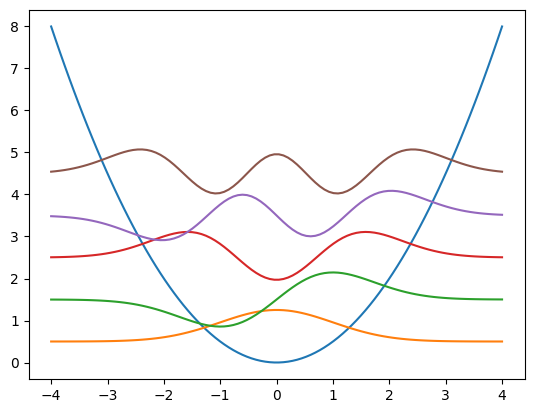

In [100]:
# plotting
x_max = 4
x_min = -x_max
xx = np.linspace(x_min, x_max, 100)

plt.plot(xx, (lambda x : 1/2* x**2)(xx))

En = 1/2
for psi in psi_all:
    plt.plot(xx, psi(xx)+En)
    En += 1

 - 2.3) Choose one of the eigen function and calculate $\int_{-\infty}^{\infty}|\psi|^2 dx$. Check that it is close to 1.

For the integration with infinities choose some large value where $\psi$ goes to zero. Try increasing the value to see if the answers change too much, if yes then you should choose a value larger than the previous one.

**Bonus:** Can you think of another way to do such integral. Think about substitution.

In [138]:
for psi in psi_all: # psi^dag = psi - no imaginary part
    print(psi, ":", 
    integrate_fav((lambda x : psi(x)*psi(x)), -2**4, 2**4), "    \t")
    #integrate((lambda x : psi(x)*psi(x)), -2**4, 2**4))

<function psi0 at 0x000001E9BD59F060> : 0.9999999999999998     	
<function psi1 at 0x000001E9BD59F920> : 1.0     	
<function psi2 at 0x000001E9BD59F880> : 1.0     	
<function psi3 at 0x000001E9BAC5A200> : 0.9999999999999999     	
<function psi4 at 0x000001E9BAC5A020> : 0.9999999999999998     	


 - 2.4) Choose the ground state wave function. Find $\langle x \rangle$, $\langle p \rangle$, $\langle x^2 \rangle$ and $\langle p^2 \rangle$

*Hint:* $\langle \mathcal{O} \rangle = \int_{-\infty}^{\infty} dx \psi^{*}(x)\mathcal{O}\psi(x)$; $p$ should be replaced by $-i\frac{d}{dx}$ and $p^2 =  p p = (-i\frac{d}{dx})(-i\frac{d}{dx}) = -\frac{d^2}{dx^2}$


In [191]:
f = lambda x : psi0(x)

d_x_b = integrate_fav(lambda x : f(x)*x*f(x), -2**4, 2**4)
print("<x> =", d_x_b)
d_xx_b = integrate_fav(lambda x : f(x)*x*x*f(x), -2**4, 2**4)
print("<x^2> =", d_xx_b)

p = lambda x : -1j*derivative_fav((lambda x : f(x)), x, dx=0.00002)
d_p_b = integrate_fav(lambda x : f(x)*p(x), -2**4, 2**4,)
print("<p> =", d_p_b.real, d_p_b.imag)

def derivative_2ord(f, x0, dx=2**(-5)):
    return (f(x0 + dx) - 2*f(x0) + f(x0 - dx))/dx/dx

pp = lambda x : -derivative_2ord((lambda x : f(x)), x, dx=0.00002)
d_pp_b = integrate_fav(lambda x : f(x)*pp(x), -2**4, 2**4)
print("<p^2> =", d_pp_b)

<x> = 1.2230759573785176e-17
<x^2> = 0.5
<p> = 0.0 -5.6018227192481216e-14
<p^2> = 0.5000000106272702


 - 2.5) Calculate $\Delta_x \Delta_p = \sqrt{(\langle x^2\rangle - \langle x\rangle^2)(\langle p^2\rangle - \langle p\rangle^2)}$. If your code is correct you should get the value $1/2$. The ground state reaches the Heisenberg Uncertainty limit (remember $\hbar=1$).

**Bonus:** Pick another eigen function and show that it satisfies the Heisenberg Uncertainty relation but the inequality is strict.

In [192]:
np.sqrt((d_xx_b-d_x_b**2)*(d_pp_b-d_p_b**2))

(0.5000000053136351+0j)

In [203]:
# Bonus
for psi in psi_all:
    f = lambda x : psi(x)

    d_x_b = integrate_fav(lambda x : f(x)*x*f(x), -2**4, 2**4)
    d_xx_b = integrate_fav(lambda x : f(x)*x*x*f(x), -2**4, 2**4)
    d_p_b = integrate_fav(lambda x : f(x)*p(x), -2**4, 2**4,)
    d_pp_b = integrate_fav(lambda x : f(x)*pp(x), -2**4, 2**4)
    print(psi, "/\\x /\\y =", np.sqrt((d_xx_b-d_x_b**2)*(d_pp_b-d_p_b**2)))

<function psi0 at 0x000001E9BD59F060> /\x /\y = (0.5000000053136351+0j)
<function psi1 at 0x000001E9BD59F920> /\x /\y = (1.5000000145526722+0j)
<function psi2 at 0x000001E9BD59F880> /\x /\y = (2.5000000264432964+0j)
<function psi3 at 0x000001E9BAC5A200> /\x /\y = (3.500000056733725+0j)
<function psi4 at 0x000001E9BAC5A020> /\x /\y = (4.500000060327629+0j)


#### Coherent States
Coherent states for the quantum harmonic oscillator are the eigen states of the annihilation operator. $\hat{a}|\alpha\rangle = \alpha|\alpha\rangle$. where $\alpha$ is the eigen value. For this problem take $\alpha = \frac{1}{\sqrt{2}}$. Then the state in position space have the form
$$
\psi(x,t) = \left(\frac{1}{\pi}\right)^{1/4}\exp \left[-\frac{1}{2}\left(\left(x - \cos t\right)^2  + i \left(\sin t \cos  t -  t - x\sin t\right)\right)\right]
$$

- 2.6) Define the wave function below

In [246]:
def coherent_state(x,t):
    return (1/np.pi)**(1/4) * \
        np.exp(-1/2 * \
               ((x-np.cos(t))**2 \
                +1j*(np.sin(t)*np.cos(t) - t - x*np.sin(t))))

def coherent_state_dag(x,t):
    return (1/np.pi)**(1/4) * \
        np.exp(-1/2 * \
               ((x-np.cos(t))**2 \
                -1j*(np.sin(t)*np.cos(t) - t - x*np.sin(t))))


- 2.7) Take a range of time starting from 0 to $4\pi$. For each value of time calculate $\langle x \rangle$ and $\langle p \rangle$ for the above wave function. Plot them. Plot $\sin(t)$ and $\cos(t)$ on the same figure.

C:\Users\Tomek\AppData\Local\Temp\ipykernel_4932\3166454175.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  X_all[i] = integrate_fav(lambda x: f_dag(x,t)*x*f(x,t), -2**4, 2**4)
C:\Users\Tomek\AppData\Local\Temp\ipykernel_4932\3166454175.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  P_all[i] = integrate_fav(lambda x : f_dag(x,t)*p(x,t), -2**4, 2**4,)


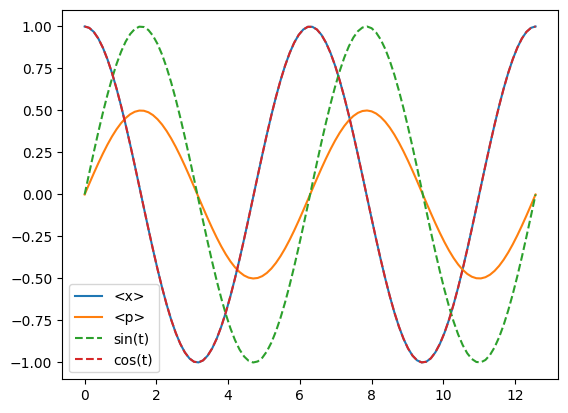

In [ ]:
f = lambda x, t : coherent_state(x,t)
f_dag = lambda x, t : coherent_state_dag(x,t)
p = lambda x, t : -1j*derivative_fav((lambda x : f(x,t)), x, dx=0.000000002)

n = 100
t_min = 0
t_max = 4*np.pi
t_range = np.linspace(t_min, t_max, n)
X_all = np.zeros(n)
P_all = np.zeros(n)
i=0
for t in np.linspace(t_min,t_max, n):
    X_all[i] = integrate_fav(lambda x : f_dag(x,t)*x*f(x,t), -2**4, 2**4)
    P_all[i] = integrate_fav(lambda x : f_dag(x,t)*p(x,t), -2**4, 2**4,)
    i += 1
plt.plot(t_range, X_all, label="<x>")
plt.plot(t_range, P_all, label="<p>")
plt.plot(t_range, np.sin(t_range), label="sin(t)", linestyle="--")
plt.plot(t_range, np.cos(t_range), label="cos(t)", linestyle="--")
plt.legend()
plt.show()

Coherent states behave exactly like a classical particle in a harmonic potential. 

**Bonus:** These states also saturates the uncertainty principle($\Delta_x\Delta_p = \frac{1}{2}$), along with $\Delta_x = \Delta_p = \frac{1}{\sqrt{2}}$ (symmetric spread in space and momentum).

Coherent states are used in quantum optics experiments. A generalization of these states(assymetric spread in space and momentum but saturates the uncertainty relation) known as squeezed coherent states are used in detecting gravitational waves, in atomic clocks as well as in quantum information processing.

Here is a sample code to animate the probability density of the coherent state. Familiarise yourself with the code. Add x and y labels; play with different parameters.

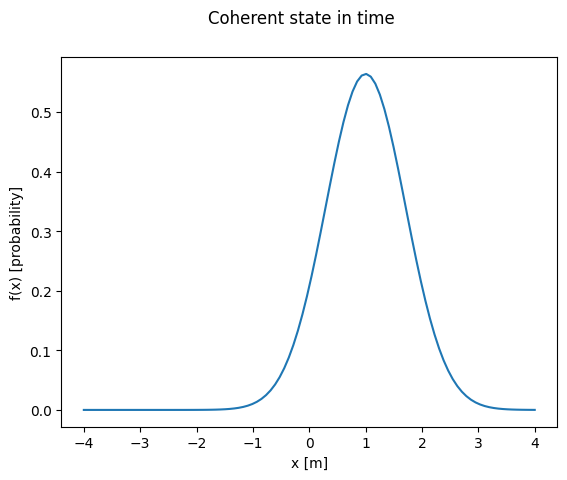

In [235]:
# Set up the figure
fig, ax = plt.subplots()
x = np.linspace(-4, 4, 100) 
line, = ax.plot(x, np.abs(coherent_state(x, 0))**2)  # Initialize plot with t = 0
fig.suptitle('Coherent state in time')
ax.set(xlabel='x [m]', ylabel='f(x) [probability]')


# Function to update the plot for each frame
def update(t):
    y = np.abs(coherent_state(x, t))**2 
    line.set_ydata(y)
    return line,

# Create the animation and save it
ani = FuncAnimation(fig, update, frames=np.linspace(0, 4*np.pi, 100), interval=40, blit=True)
ani.save('coherent_state.gif', writer=PillowWriter(fps=30))

**Bonus:** Find out a simple wave function for squeezed states ([wikipedia](https://en.wikipedia.org/wiki/Squeezed_coherent_state#Mathematical_definition)) and see how its probability changes with time using the same code as above i.e. replace `coherent_state` with your new wave function.

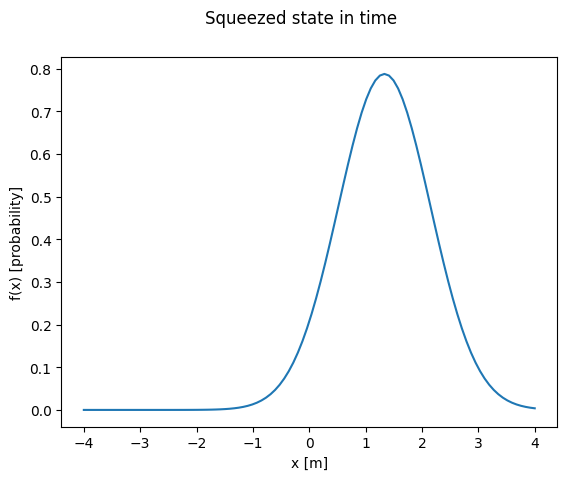

In [ ]:
# it's not working
def squeezed_state(x, t, dagger=False):
    C = 1
    x_0 = 0
    w_0 = 0.5
    p_0 = 0
    i=1
    if dagger: i = -1
    return C * np.exp((x-x_0)**2/2*w_0**2 + i*1j*p_0*x) * coherent_state(x, t)

# Set up the figure
fig, ax = plt.subplots()
x = np.linspace(-4, 4, 100) 
line, = ax.plot(x, np.abs(squeezed_state(x, 0))**2)  # Initialize plot with t = 0
fig.suptitle('Squeezed state in time')
ax.set(xlabel='x [m]', ylabel='f(x) [probability]')


# Function to update the plot for each frame
def update(t):
    y = np.abs(squeezed_state(x, t))**2 
    line.set_ydata(y)
    return line,

# Create the animation and save it
ani = FuncAnimation(fig, update, frames=np.linspace(0, 4*np.pi, 100), interval=40, blit=True)
ani.save('squeezed_state.gif', writer=PillowWriter(fps=30))